# MLP

## Bibliotecas

In [1]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.neural_network import MLPClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---

## Importação dos dados

In [2]:
#Carregando o dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

---

## Treinamento do modelo

Vamos estudar a implementação do [MLP no sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Primeiro, o MLPClassifier treina iterativamente, já que em cada passo de otimização, as derivadas parciais da função de custo (loss function) em relação aos parâmetros da rede (pesos e bias de cada camada) são calculadas. 

O método de inicialização usado foi proposto em: Glorot, Xavier, and Yoshua Bengio. “Understanding the difficulty of training deep feedforward neural networks.” International Conference on Artificial Intelligence and Statistics. 2010.

Alguns hiperparâmetros importantes no MLP:
 
- **hidden_layer_sizes**: Tupla que controla a profundidade (quantidade de camadas) e números de neurônios por cada camada escondida. Por exemplo: (100, 10,) cria uma rede com 100 neuronios na primeira camada escondida e 10 na segunda camada. O número de neurônios na entrada da rede é o número de features. A saída da ultima camada escondida tem o tamanho da quantidade de classes ou dimensões (regressão).

- **activation**: Define {‘identity’, ‘logistic’, ‘tanh’, ‘relu’} funções de ativação.
    - identity: $f(x) = x$
    - logistic: $1 / (1 + e^{-x})$
    - tanh: $tanh(x)$
    - relu: $max(0, x)$

- **batch_size**: default='auto'. Tamanho do batch de treinamento, se for mantido em "auto", $batch\_size=min(200, n\_samples)$.

- **random_state**: default= 'none'. Determina a geração de números aleatórios para inicialização dos pesos e bias, divisão de teste de treinamento se a parada antecipada for usada e amostragem em lote quando solver='sgd' ou 'adam'. Passe um int para resultados reproduzíveis em várias chamadas de função.

- **learning_rate**: default=’constant’ Esquema de redução de _learning_rate_. Caso seja constante, a mesma _learning_rate_ no início do treino segue até o fim.

- **max_iter**: default=200 Número máximo de iterações, caso o modelo não atinja convergência.

- **tol**: default=1e-4 (0.0001). Caso a função de custo no treinamento não melhorar mais do que _tol_, é considerado que o modelo atingiu convergência.

- **early_stopping**: default=False Se esse parâmetro for verdadeiro, separa automaticamente uma fração do dataset de treino em um dataset de validação, de tamanho validation_fraction_.

In [3]:
# Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

# Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Vamos analisar os valores default
model = MLPClassifier()

# treinando o modelo
model.fit(X_train, y_train)

# Resultados do classificador
print(model)

# Resultados do classificador

print(classification_report(y_test, model.predict(X_test)))
# print("Treinamento score %.2f" %(model.score(X_train, y_train)))
# print("Teste score %.2f" %(model.score(X_test, y_test)))

MLPClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



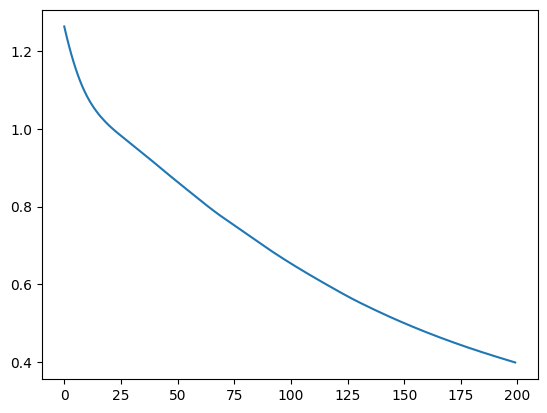

In [5]:
# como se comportou o treinamento do modelo?
plt.plot(model.loss_curve_)

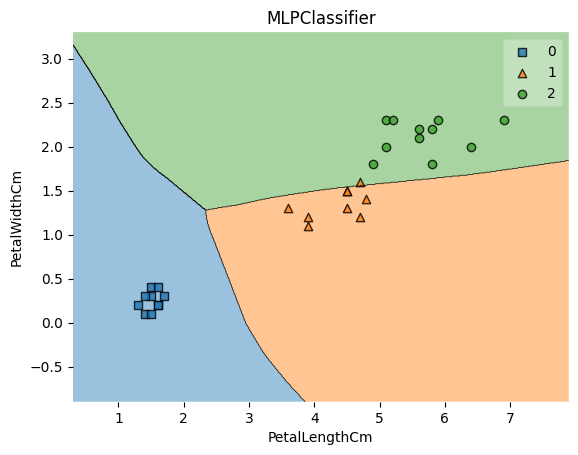

In [6]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

show_decision_region(X_test, y_test, model)

In [7]:
# E se definirmos o random_state?
model = MLPClassifier(random_state=20)

# treinando o modelo
model.fit(X_train, y_train)

# Resultados do classificador
print(model)

# Resultados do classificador
print(classification_report(y_test, model.predict(X_test)))
# print("Treinamento score %.2f" %(model.score(X_train, y_train)))
# print("Teste score %.2f" %(model.score(X_test, y_test)))

MLPClassifier(random_state=20)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



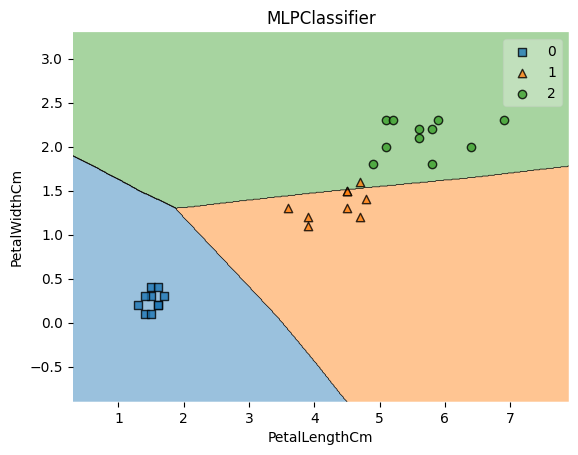

In [8]:
show_decision_region(X_test, y_test, model)

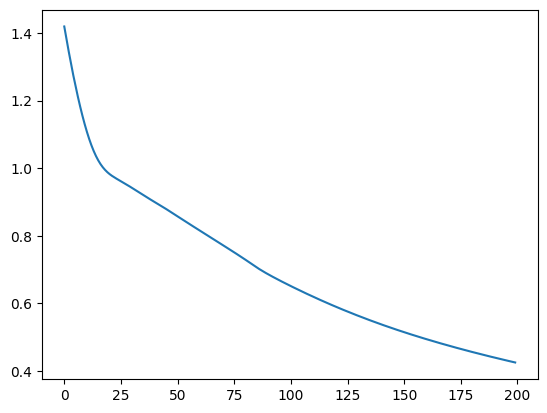

In [9]:
# como se comportou o treinamento do modelo?
plt.plot(model.loss_curve_)

In [10]:
# Avaliando o modelo com diferentes hiperparametros

In [11]:
# Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando o conjutno de treinamento em treinamento e validação (para ajuste dos parâmetros)
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


print("X_train_ shape: ", X_train_.shape)
print("X_test shape: ", X_test.shape)
print("X_val shape: ", X_val.shape)

X_train_ shape:  (96, 2)
X_test shape:  (30, 2)
X_val shape:  (24, 2)


In [12]:
## Ajustando o modelo
# 1 - número de neurônios

n_neuronios = [10*i for i in range(1,11)]
print(n_neuronios)
train_score = []
val_score = []

for n in n_neuronios:
    model = MLPClassifier(hidden_layer_sizes=n, random_state=20)
    model.fit(X_train_, y_train_)
    # Resultados do classificador
    train_score.append(model.score(X_train_, y_train_))
    val_score.append(model.score(X_val, y_val))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


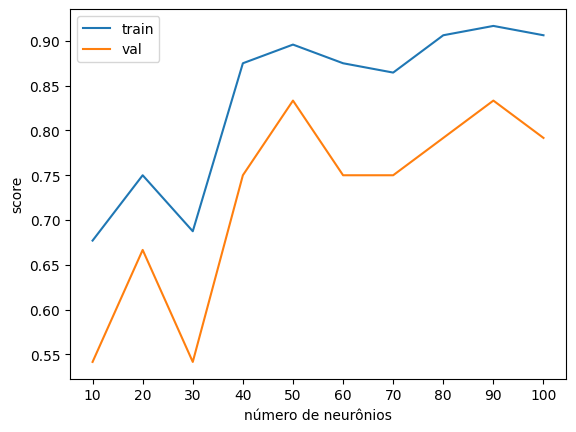

In [13]:
plt.plot(n_neuronios,train_score, label="train" )
plt.plot(n_neuronios,val_score, label="val" )
plt.xlabel("número de neurônios")
plt.ylabel("score")
plt.xticks(n_neuronios)
plt.legend()

---

In [14]:
# 2 - número de camadas
# qual melhor número de neurônios??
neu = 20
n_camadas = [1,2,3,4,5]

train_score = []
val_score = []

for n in n_camadas:
    camadas = [neu for i in range(n)]
    model = MLPClassifier(hidden_layer_sizes=camadas, random_state=20)
    model.fit(X_train_, y_train_)
    #Resultados do classificador
    # print(model.n_layers_)
    train_score.append(model.score(X_train_, y_train_))
    val_score.append(model.score(X_val, y_val))

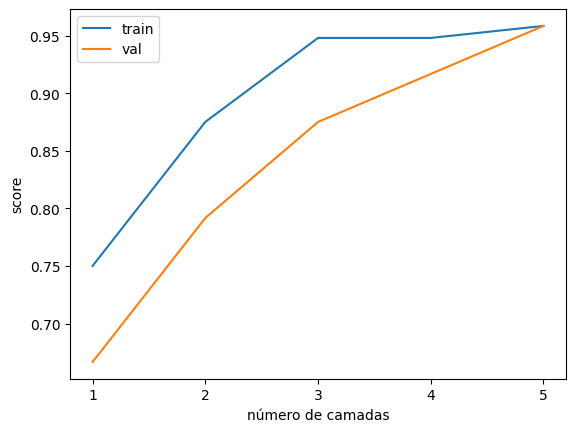

In [15]:
plt.plot(n_camadas,train_score, label="train" )
plt.plot(n_camadas,val_score, label="val" )
plt.xlabel("número de camadas")
plt.ylabel("score")
plt.xticks(n_camadas)
plt.legend()